## Importing Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from numpy import isnan



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# This is for regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR


# This is for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('importing completed')

importing completed


## Loading Dataset

In [ ]:
data=pd.read_csv('/content/Social Development Bank Loans For 2019.csv')
data.head()

,ID,bank branch,funding type,funding classification,customer sector,financing value,installment value,cashing date,sex,age,social status,special needs,number of family members,saving loan,income
0,1.0,Tabūk,social,family,government employee,60000.0,>= 1000,2019/02,MALE,>= 30,married,No,>= 05,No,< 5000
1,2.0,Hail,project,solution,NaN,160000.0,>= 1000,2019/01,MALE,< 30,single,No,< 02,No,< 5000
2,3.0,Tabūk,social,marriage,government employee,60000.0,>= 1000,2019/02,MALE,< 30,married,No,>= 02,No,>= 7500
3,4.0,Medina,social,marriage,employee of a government company,60000.0,< 1000,2019/03,MALE,< 30,married,No,>= 10,No,>= 5000
4,5.0,Medina,social,family,private sector employee,60000.0,>= 1000,2019/02,FEMALE,>= 30,divorced,No,>= 02,No,>= 10000


### knowing the data

In [ ]:
print('Shape of dataset is ', data.shape)

Shape of dataset is  (11175, 15)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11175 entries, 0 to 11174
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        11175 non-null  float64
 1   bank branch               11175 non-null  object 
 2   funding type              11175 non-null  object 
 3   funding classification    11175 non-null  object 
 4   customer sector           7225 non-null   object 
 5   financing value           11175 non-null  float64
 6   installment value         11175 non-null  object 
 7   cashing date              11175 non-null  object 
 8   sex                       11175 non-null  object 
 9   age                       11169 non-null  object 
 10  social status             11175 non-null  object 
 11  special needs             11175 non-null  object 
 12  number of family members  11132 non-null  object 
 13  saving loan               11175 non-null  object 
 14  income

In [ ]:
data.describe()

,ID,financing value
count,11175.000000,1.117500e+04
mean,5588.000000,6.396923e+04
std,3226.088963,4.743736e+04
min,1.000000,1.800000e+04
25%,2794.500000,6.000000e+04
50%,5588.000000,6.000000e+04
75%,8381.500000,6.000000e+04
max,11175.000000,2.116000e+06


In [ ]:
#Checking for the null values in the dataset
data.isnull().sum()

ID                             0
bank branch                    0
funding type                   0
funding classification         0
customer sector             3950
financing value                0
installment value              0
cashing date                   0
sex                            0
age                            6
social status                  0
special needs                  0
number of family members      43
saving loan                    0
income                       114
dtype: int64

**Explanation about missing values in our dataset.**

we have 4 column have missing values.

1- column customer sector has 3950 values is missing.

2- column age has 6 values is missing.

3- column number of family members has 43 values is missing.

4- column income has 114 values is missing.

## Data Preprocessing

### Handling Missing values

In [ ]:
def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent*100], axis=1, keys=['Missing_Number', 'Missing_Percent %'])
    return missing_values

missing(data)

,Missing_Number,Missing_Percent %
customer sector,3950,35.346756
income,114,1.020134
number of family members,43,0.384787
age,6,0.053691
ID,0,0.000000
bank branch,0,0.000000
funding type,0,0.000000
funding classification,0,0.000000
financing value,0,0.000000
installment value,0,0.000000


In [ ]:
# See what is the frequent value in each column (for missing values columns).
# customer sector coulmn
sector_freq = data['customer sector'].mode()[0]
print(sector_freq)

# income column
income_freq = data['income'].mode()[0]
print(income_freq)

# number of family members column
family_num_freq = data['number of family members'].mode()[0]
print(family_num_freq)

# age column
age_freq = data['age'].mode()[0]
print(age_freq)

government employee
>= 7500
>= 02
< 30


In [ ]:
# Fill in the Missing Values using the Simple Imputer with the Most Frequent strategy
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(data[['customer sector', 'income', 'number of family members', 'age']])
data[['customer sector', 'income','number of family members', 'age']] = imputer.transform(
    data[['customer sector', 'income', 'number of family members', 'age']])

**Each column's missing values were replaced with its most frequent value.** 

**We filled in the missing values using the most frequent strategy only because the data type of these columns is Categorical.**

In [ ]:
# Check if missing values is filling in each column 
print('Customer sector missing values after handling = ', data['customer sector'].isnull().sum())
print('Income missing values after handling = ', data['income'].isnull().sum())
print('Number of family members missing values after handling = ', data['number of family members'].isnull().sum())
print('Age missing values after handling = ', data['age'].isnull().sum())

Customer sector missing values after handling =  0
Income missing values after handling =  0
Number of family members missing values after handling =  0
Age missing values after handling =  0


In [ ]:
# Re-check the missing values function.
def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent*100], axis=1, keys=['Missing_Number', 'Missing_Percent %'])
    return missing_values

missing(data)

,Missing_Number,Missing_Percent %
ID,0,0.0
bank branch,0,0.0
funding type,0,0.0
funding classification,0,0.0
customer sector,0,0.0
financing value,0,0.0
installment value,0,0.0
cashing date,0,0.0
sex,0,0.0
age,0,0.0


### Outlier Detection - Box Plot

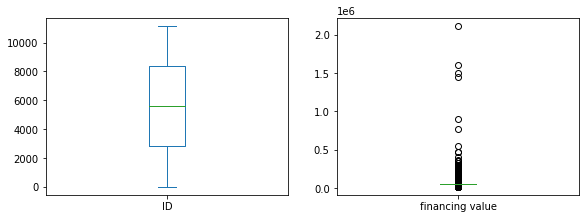

In [ ]:
# Create a box plot to detect outliers in the data
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,15)
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False)
plt.show()

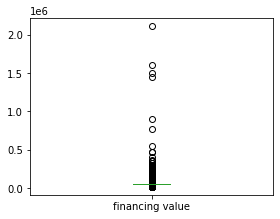

In [ ]:
# From the above plot we can see the financing value column has notable outliers.
# We have to handle them.
# The plot before handling the outliers.
plt.rcParams['figure.figsize']=(20,15)
data['financing value'].plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False)
plt.show()

#### Handling outliners

In [ ]:
# From the above plot we can see the financing value column has notable outliers.
# We have to handle them.

# First quartile (Q1)
Q1 = np.percentile(data['financing value'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['financing value'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

print('lower bound outliers is:', Q1 - 1.5 * (IQR))

lower bound outliers is: 60000.0


In [ ]:
# Dropping the outliers from financing value column
data=data.drop(data[(data['financing value'] > 200000) | (data['financing value'] < 60000.0)].index)

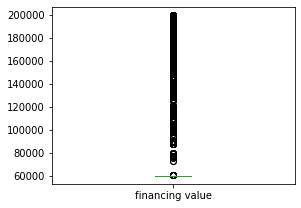

In [ ]:
# The plot after handling the outliers.
plt.rcParams['figure.figsize']=(20,15)
data['financing value'].plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False)
plt.show()

In [ ]:
# Shape the data after handing Outliners
print('Shape of dataset after handing Outliners : ', data.shape)

Shape of dataset after handing Outliners :  (8942, 15)


### Feature Engineering

In [ ]:
# Delete unneeded coulmns, ID, and bank branch.
data.drop(['ID'], axis=1, inplace=True)
data.drop(['cashing date'], axis=1, inplace=True)
data.drop(['social status'], axis=1, inplace=True)
data.drop(['special needs'], axis=1, inplace=True)
data.head(5)

,bank branch,funding type,funding classification,customer sector,financing value,installment value,sex,age,number of family members,saving loan,income
0,Tabūk,social,family,government employee,60000.0,>= 1000,MALE,>= 30,>= 05,No,< 5000
1,Hail,project,solution,government employee,160000.0,>= 1000,MALE,< 30,< 02,No,< 5000
2,Tabūk,social,marriage,government employee,60000.0,>= 1000,MALE,< 30,>= 02,No,>= 7500
3,Medina,social,marriage,employee of a government company,60000.0,< 1000,MALE,< 30,>= 10,No,>= 5000
4,Medina,social,family,private sector employee,60000.0,>= 1000,FEMALE,>= 30,>= 02,No,>= 10000


In [ ]:
# Count the values in the bank branch column
data['bank branch'].value_counts()

Riyadh             1366
Dammam              944
Jeddah              805
Medina              686
Abha                608
Mecca               595
Jazan               406
Khamis Mushait      365
Taif                357
Tabūk               346
Buraydah            285
Najrān              276
Kharj               184
Hafar Al Batin      183
Al Bahah            182
Hail                164
Yanbu               159
Arar                146
Al Qunfudhah        138
Al Jowf             129
Al Qurayyat         105
Al Majma'ah         104
Ar Rass              93
Bisha                92
Duwadimi             88
Wadi ad-Dawasir      73
Al Namas             63
Name: bank branch, dtype: int64

In [ ]:
# Replace the cities in the bank branch columns with their main region.
# Instead of 27 different values, we ended up with 5 regions. 
Central_Region = ['Riyadh', "Kharj", "Al Majma'ah", "Wadi ad-Dawasir", "Duwadimi"]
Eastern_Region = ["Dammam", "Hafar Al Batin"]
Southern_Region = ["Abha", "Khamis Mushait", "Al Bahah", "Jazan", "Najrān", "Bisha"] 
Western_Region = ["Jeddah", "Yanbu", "Mecca", "Medina", "Taif", "Al Qunfudhah"]
Northern_Region = ["Tabūk", "Buraydah", "Hail", "Arar", "Al Jowf", "Ar Rass", "Al Namas", "Al Qurayyat"]

data['bank branch'] = data['bank branch'].replace(Central_Region,'Central Region')
data['bank branch'] = data['bank branch'].replace(Eastern_Region,'Eastern Region')
data['bank branch'] = data['bank branch'].replace(Southern_Region,'Southern Region')
data['bank branch'] = data['bank branch'].replace(Western_Region,'Western Region')
data['bank branch'] = data['bank branch'].replace(Northern_Region,'Northern Region')
data.head()

,bank branch,funding type,funding classification,customer sector,financing value,installment value,sex,age,number of family members,saving loan,income
0,Northern Region,social,family,government employee,60000.0,>= 1000,MALE,>= 30,>= 05,No,< 5000
1,Northern Region,project,solution,government employee,160000.0,>= 1000,MALE,< 30,< 02,No,< 5000
2,Northern Region,social,marriage,government employee,60000.0,>= 1000,MALE,< 30,>= 02,No,>= 7500
3,Western Region,social,marriage,employee of a government company,60000.0,< 1000,MALE,< 30,>= 10,No,>= 5000
4,Western Region,social,family,private sector employee,60000.0,>= 1000,FEMALE,>= 30,>= 02,No,>= 10000


In [ ]:
# Count the values in the bank branch column after we replace them.
data['bank branch'].value_counts()

Western Region     2740
Southern Region    1929
Central Region     1815
Northern Region    1331
Eastern Region     1127
Name: bank branch, dtype: int64

#### Map certain columns values to 0 and 1

In [ ]:
# Map the saving loan coulmn from Yes/No to 0/1 
data['saving loan'] = data['saving loan'].map({'Yes': 0, 'No': 1})

# Map the sex column with 0 -> male , 1 -> female
data['sex'] = data['sex'].map({'MALE': 0, 'FEMALE': 1})

In [ ]:
data.head(5)

,bank branch,funding type,funding classification,customer sector,financing value,installment value,sex,age,number of family members,saving loan,income
0,Northern Region,social,family,government employee,60000.0,>= 1000,0,>= 30,>= 05,1,< 5000
1,Northern Region,project,solution,government employee,160000.0,>= 1000,0,< 30,< 02,1,< 5000
2,Northern Region,social,marriage,government employee,60000.0,>= 1000,0,< 30,>= 02,1,>= 7500
3,Western Region,social,marriage,employee of a government company,60000.0,< 1000,0,< 30,>= 10,1,>= 5000
4,Western Region,social,family,private sector employee,60000.0,>= 1000,1,>= 30,>= 02,1,>= 10000


#### Label Encoding

In [ ]:
# Apply Label Encoding to convert categorical type columns into numerical ones.
# Create a list of the columns to be converted into numerical values.
cols = ['bank branch', 'funding type', 'funding classification',	'customer sector', 'installment value', 'age', 'number of family members', 'income']

# Encode labels of multiple columns at once
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

# Print head
data.head()

,bank branch,funding type,funding classification,customer sector,financing value,installment value,sex,age,number of family members,saving loan,income
0,2,1,1,4,60000.0,1,0,1,2,1,0
1,2,0,6,4,160000.0,1,0,0,0,1,0
2,2,1,4,4,60000.0,1,0,0,1,1,3
3,4,1,4,3,60000.0,0,0,0,3,1,2
4,4,1,1,5,60000.0,1,1,1,1,1,1


**The important columns' values before the encoding and after:**
- The unique values of the (bank branch) column are ['Northern Region', 'Western Region', 'Central Region', 'Southern Region', 'Eastern Region'], and after encoding become [2, 4, 0, 3, 1].

- The unique values of the (Funding type) column are ['social', 'project', 'transfer'], and after encoding become [1, 0, 2].

- The unique values of the (income) column are ['< 5000', '>= 7500', '>= 5000', '>= 10000'], and after encoding become [0, 3, 2, 1].

In [ ]:
# Get descriptive state for features (Mean, Median, Standard Deviation, Max, and Min)
data.describe().round(2) 

,bank branch,funding type,funding classification,customer sector,financing value,installment value,sex,age,number of family members,saving loan,income
count,8942.00,8942.00,8942.00,8942.00,8942.00,8942.00,8942.00,8942.00,8942.00,8942.0,8942.00
mean,2.30,0.97,3.06,4.10,64932.57,0.75,0.12,0.75,1.22,0.9,1.48
std,1.51,0.25,1.58,0.88,21682.38,0.43,0.32,0.95,0.63,0.3,1.19
min,0.00,0.00,0.00,0.00,60000.00,0.00,0.00,0.00,0.00,0.0,0.00
25%,1.00,1.00,1.00,4.00,60000.00,0.00,0.00,0.00,1.00,1.0,0.00
50%,3.00,1.00,4.00,4.00,60000.00,1.00,0.00,0.00,1.00,1.0,1.00
75%,4.00,1.00,4.00,5.00,60000.00,1.00,0.00,1.00,1.00,1.0,3.00
max,4.00,2.00,8.00,5.00,200000.00,1.00,1.00,3.00,3.00,1.0,3.00


Text(0.5, 1.0, 'Correlation between variables')

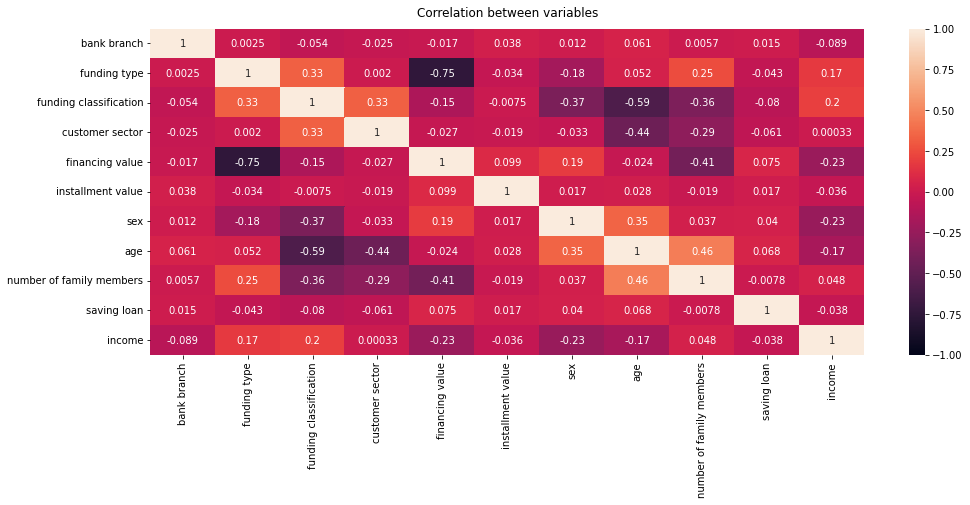

In [ ]:
# Create the a plot to show the Correlation between features. 
plt.figure(figsize=(16, 6)) # set size 
# visualize corr 
g = sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
# get title 
g.set_title('Correlation between variables', fontdict={'fontsize':12}, pad=12)

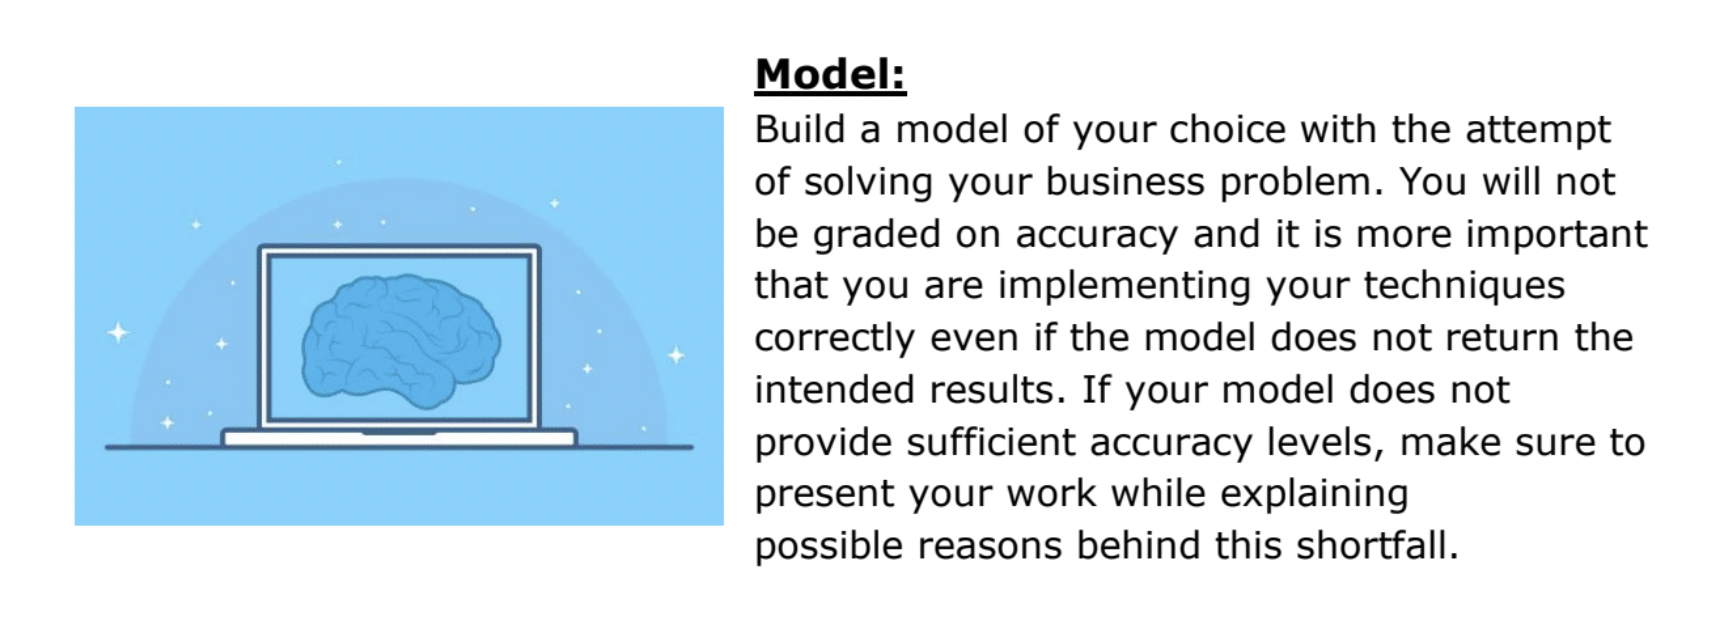

## Modeling section
### Based on our target class selection, we build regression models.

### Split Data

In [ ]:
# Split data into X and y. 
# X for the train set , y for the test set 
X = data.drop(columns='financing value')
y = pd.DataFrame(data['financing value']) #target class


print('X shape :', {X.shape})
print('y shape :', {y.shape})

X shape : {(8942, 10)}
y shape : {(8942, 1)}


In [ ]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((6259, 10), (2683, 10))

In [ ]:
y.value_counts()

financing value
60000.0            8381
77360.0              69
99935.0              46
200000.0             14
140000.0             12
                   ... 
126000.0              1
132000.0              1
134000.0              1
139000.0              1
76000.0               1
Length: 112, dtype: int64

### Scale Data

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Baseline Model

In [ ]:
# Create a baseline model
pred = [data["financing value"].mean() for x in range(len(data))]
Baseline = mean_absolute_error(data["financing value"], pred)
print(f"The baseline's MAE is: {Baseline}")

The baseline's MAE is: 9255.05624081752


### Train Models

##### We trained 4 models (linear Regression - Random Forest Regression - Decision Tree Regression - Support Vector Regression).

### 1st Regression Model - Linear Regression

In [ ]:
# 1. Linear Regression 

lin_reg=LinearRegression() # Initialize the model
lin_reg.fit(X_train,y_train) # Fit the model

preds_lin = lin_reg.predict(X_test) # Predict X_test

In [ ]:
# Gitting Score
print ('Score of Linear Regression')
print('---------------------------')
print('R2 : ',r2_score(y_true=y_test, y_pred=preds_lin))
print('MAE: ', mean_absolute_error(y_true=y_test, y_pred=preds_lin))
print('MSE: ',mean_squared_error(y_true=y_test, y_pred=preds_lin))
print('---------------------------')

Score of Linear Regression
---------------------------
R2 :  0.6423990712492016
MAE:  6972.715624203411
MSE:  162669128.47132987
---------------------------


### 2nd Regression Model - Random Forest

In [ ]:
# 2. Random Forest Regression 

rf_reg = RandomForestRegressor(n_estimators=10, max_depth=6, random_state=42) # Initialize the model
rf_reg.fit(X_train,y_train) # Fit the model

preds_rfr = rf_reg.predict(X_test) # Predict X_test

In [ ]:
# Gitting Score
print ('Score of Random Forest Regressor')
print('---------------------------------')
print('R2: ',r2_score(y_true=y_test, y_pred=preds_rfr))
print('MAE: ', mean_absolute_error(y_true=y_test, y_pred=preds_rfr))
print('MSE: ',mean_squared_error(y_true=y_test, y_pred=preds_rfr))
print('---------------------------------')

Score of Random Forest Regressor
---------------------------------
R2:  0.9165466832062759
MAE:  1190.1031417535246
MSE:  37962089.07594064
---------------------------------


### 3rd Regression Model - Decision Tree

In [ ]:
# 3. Decision Tree Regression 

reg_tree = DecisionTreeRegressor(random_state = 42, max_depth= 4, criterion= 'mse') # Initialize the model
reg_tree.fit(X_train, y_train) # Fit the model

preds_tree = reg_tree.predict(X_test) # Predict X_test

In [ ]:
# Gitting Score
print ('Score of Decision Tree')
print('---------------------------')
print('R2 : ',r2_score(y_true=y_test, y_pred=preds_tree))
print('MAE: ', mean_absolute_error(y_true=y_test, y_pred=preds_tree))
print('MSE: ',mean_squared_error(y_true=y_test, y_pred=preds_tree))
print('---------------------------')

Score of Decision Tree
---------------------------
R2 :  0.9179531356056327
MAE:  1197.6638302295048
MSE:  37322307.77884215
---------------------------


#### Plot the decision tree

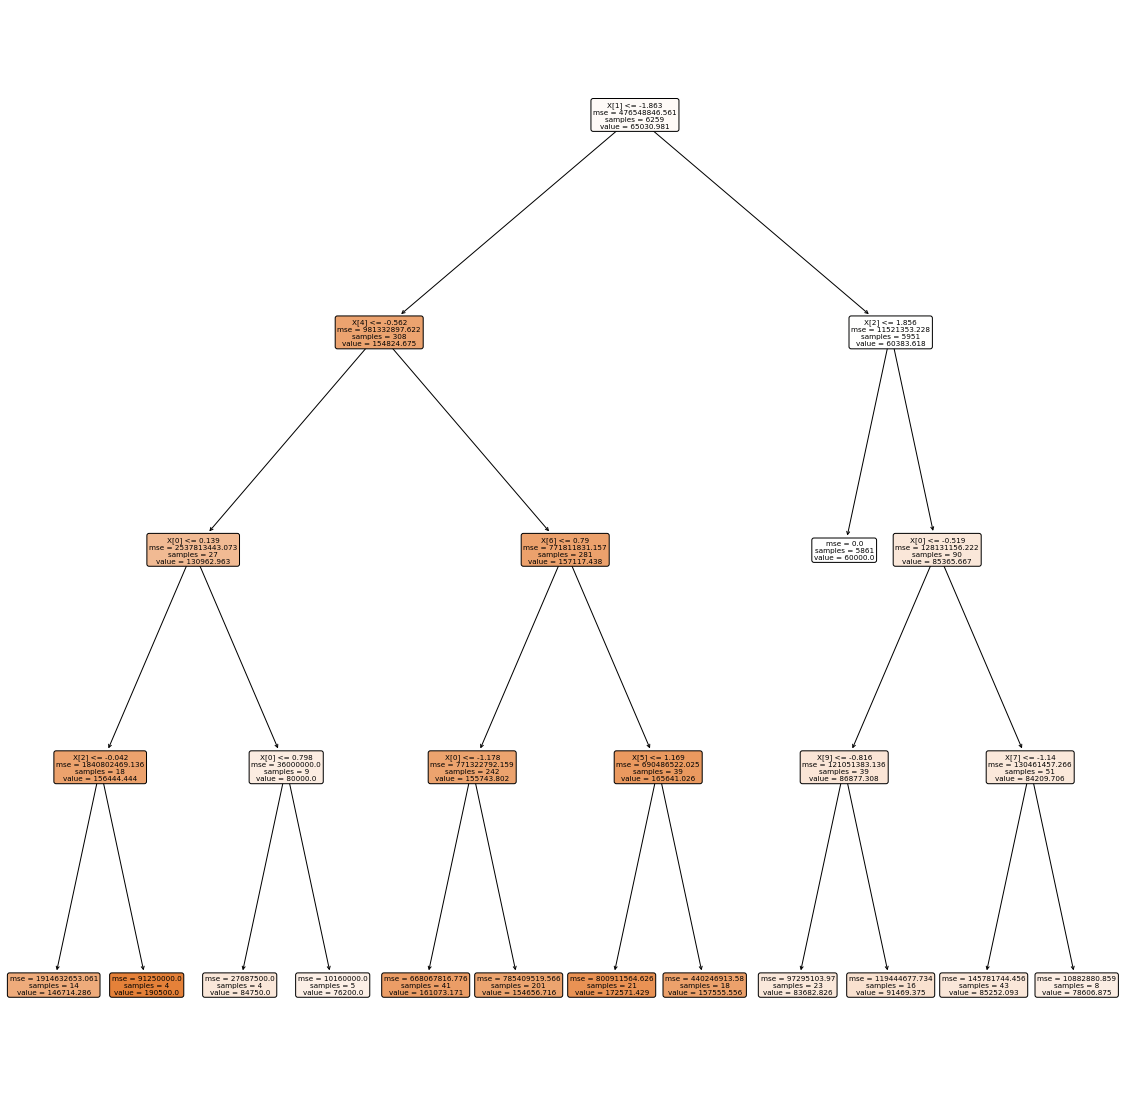

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,20))

tree.plot_tree(
    reg_tree, 
    filled=True,
    rounded=True,  
);

### 4th Regression Model - Support Vector 

In [ ]:
# 4. Support Vector Regression 

svr_reg = SVR(kernel = 'rbf') # Initialize the model
svr_reg.fit(X_train, y_train) # Fit the model

preds_svr = svr_reg.predict(X_test) # Predict X_test

In [ ]:
# Gitting Score
print ('Score of Support Vector')
print('---------------------------')
print('R2 : ',r2_score(y_true=y_test, y_pred=preds_svr))
print('MAE: ', mean_absolute_error(y_true=y_test, y_pred=preds_svr))
print('MSE: ',mean_squared_error(y_true=y_test, y_pred=preds_svr))
print('---------------------------')

Score of Support Vector
---------------------------
R2 :  -0.04630807298414297
MAE:  4697.164798826873
MSE:  475955202.184209
---------------------------


## Regression Analysis Summary

##### Function to show the evaluation for each model at once. 

##### In order to make comparisons easier.

In [ ]:
# Function for evaluating regression models
def reg_cost(method, actual, preds):
    mae = mean_absolute_error(y_true=actual, y_pred=preds)
    mse = mean_squared_error(y_true=actual, y_pred=preds)
    R2 = r2_score(y_true=actual, y_pred=preds)
    
    print(f'Cost functions for the {method} regression is:')
    print(f'R-Squared Score: {round(R2,2)}')
    print(f'Mean Square Error: {round(mse,2)}')
    print(f'Mean Absolute Error: {round(mae,2)}\n\n')

In [ ]:
model_name = ['Linear', 'Random Forest', 'Decision Tree', 'Support Vector']
model_pred = [preds_lin, preds_rfr, preds_tree, preds_svr]

for x in range(len(model_pred)):
    
    reg_cost(model_name[x],y_test, model_pred[x] )

Cost functions for the Linear regression is:
R-Squared Score: 0.64
Mean Square Error: 162669128.47
Mean Absolute Error: 6972.72


Cost functions for the Random Forest regression is:
R-Squared Score: 0.92
Mean Square Error: 37962089.08
Mean Absolute Error: 1190.1


Cost functions for the Decision Tree regression is:
R-Squared Score: 0.92
Mean Square Error: 37322307.78
Mean Absolute Error: 1197.66


Cost functions for the Support Vector regression is:
R-Squared Score: -0.05
Mean Square Error: 475955202.18
Mean Absolute Error: 4697.16




**Based on the results summary. There was almost no difference between the random forest model and the decision tree model. Therefore, the tuning method will be applied to them to conclude with only one best model.**

## Model Optimization - Hyperparameter Tuning 

### Grid Search for Random Forest Regression

---



In [ ]:
param_grid = {

    "n_estimators": [5,7,10, 15], # how many trees in our forest
    "max_depth": [2,4,6] # how deep each decision tree can be
}

grid = GridSearchCV(
    rf_reg,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=6, n_estimators=10,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [5, 7, 10, 15]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head(5) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014181,0.000500,0.002604,0.000103,2,5,"{'max_depth': 2, 'n_estimators': 5}",-1275.949724,-1422.072960,-1632.109072,-1480.393528,-1307.272763,-1423.559609,128.090977,11
1,0.020572,0.002378,0.003944,0.002717,2,7,"{'max_depth': 2, 'n_estimators': 7}",-1282.424662,-1421.878483,-1634.740121,-1477.900470,-1310.830692,-1425.554885,126.617487,12
2,0.026829,0.001839,0.003052,0.000081,2,10,"{'max_depth': 2, 'n_estimators': 10}",-1273.167672,-1422.736017,-1629.969383,-1475.992718,-1308.452272,-1422.063612,127.445006,10
3,0.037339,0.002063,0.003635,0.000091,2,15,"{'max_depth': 2, 'n_estimators': 15}",-1275.289956,-1421.724877,-1609.193501,-1477.027303,-1299.308843,-1416.508896,122.062019,9
4,0.018819,0.003157,0.003838,0.002737,4,5,"{'max_depth': 4, 'n_estimators': 5}",-1266.854383,-1375.225103,-1526.886764,-1417.862351,-1221.844635,-1361.734647,108.792475,5


In [ ]:
parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
8,6,5,-1336.696825,1
10,6,10,-1349.217469,2
11,6,15,-1350.631547,3
9,6,7,-1358.534715,4
4,4,5,-1361.734647,5
7,4,15,-1365.455617,6
6,4,10,-1372.606515,7
5,4,7,-1380.623535,8
3,2,15,-1416.508896,9
2,2,10,-1422.063612,10


In [ ]:
grid.best_score_ # Print the best model score

-1336.696825472491

In [ ]:
grid.best_params_ # Print the best parameter for the model

{'max_depth': 6, 'n_estimators': 5}

In [ ]:
# Re-create the model using the best parameters 
Rf = RandomForestRegressor(max_depth = 6, n_estimators = 5)
Rf.fit(X_train,y_train)
preds_rf = Rf.predict(X_test)

# Calculate the accuracy score for Decision Tree regression 
r2_score(y_test,preds_rf)

0.9187159701066172

In [ ]:
# Calculate the MSE for Random Forest Regression 
mean_absolute_error(y_true=y_test, y_pred=preds_rf)

1186.6477430321252

### Grid Search for Decision Trees Regression

In [ ]:
param_grid2 = {
    "max_depth": [4, 6, 10] # how deep decision tree can be   
}

grid2 = GridSearchCV(
    reg_tree,
    param_grid2,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

grid2.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             random_state=42),
             n_jobs=-1, param_grid={'max_depth': [4, 6, 10]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_df2 = pd.DataFrame(grid2.cv_results_)
grid_df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005568,0.001417,0.002009,0.000511,4,{'max_depth': 4},-1286.587387,-1401.245110,-1298.918870,-1437.606524,-1305.774610,-1346.026500,61.332450,1
1,0.004055,0.000225,0.001529,0.000033,6,{'max_depth': 6},-1312.680831,-1462.052617,-1311.160764,-1446.539006,-1275.619136,-1361.610471,76.987366,2
2,0.004342,0.000319,0.001434,0.000189,10,{'max_depth': 10},-1494.448869,-1507.198092,-1359.233663,-1404.275038,-1342.331352,-1421.497403,67.981132,3


In [ ]:
parameters = ['param_max_depth','mean_test_score','rank_test_score']
grid_df2[parameters].sort_values(by = ['rank_test_score'])

,param_max_depth,mean_test_score,rank_test_score
0,4,-1346.026500,1
1,6,-1361.610471,2
2,10,-1421.497403,3


In [ ]:
grid2.best_score_ # Print the best score

-1346.0265002604806

In [ ]:
grid2.best_params_ # Print the best parameter for the model

{'max_depth': 4}

In [ ]:
# Re-create the model using the best parameters
DT = DecisionTreeRegressor(max_depth= 4)
DT.fit(X_train, y_train)
preds_dt = DT.predict(X_test)

# Calculate the accuracy score for Decision Tree regression 
r2_score(y_test,preds_dt)

0.9179531356056327

In [ ]:
# Calculate the MSE for Decision Tree regression 
mean_absolute_error(y_true=y_test, y_pred=preds_dt)

1197.6638302295048

## Model Selection

#### As a result of tuning the models, we can conclude that the Random Forest Regression is our best model. A better MAE was achieved than with a Decision Tree model.

#### In the Random Forest, the MAE is 1186, while in the Decision Tree, it is 1197.

## ML Pipeline for Best Model

In [ ]:
pipe = make_pipeline(
    # Step-1 Scale parameters
    StandardScaler(),
    # Step-2 fit the principles to the ML model
    RandomForestRegressor(max_depth = 6, n_estimators = 5)
)

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.9278863735651952